# Impact of Dunning-Kruger Effect on Decisionmaking

## Setup

### Imports

In [119]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from numpy.random import random_sample, binomial

### Utilities

In [71]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], 
                        columns=dictionary.keys())

In [82]:
def weighted_average(x, y, w):
    return (x * w) + (y * (1 - w))

In [89]:
def logit(x):
    return np.log(x / (1 - x))

In [95]:
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

### Graph options

In [109]:
# !wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# mpl.font_manager._rebuild()

sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

## Simulation

In [86]:
def dke_rounds(sx, sy, dke, size=1, wx_dke=0.7):
    # Computes a single decisionmaking round based on skill of decisionmaker and
    # supporter, and strength of Dunning-Kruger effect (DKE).
    #
    # Args:
    #   sx: Skill level of decisionmaker x [0, 1].
    #   sy: Skill level of supporter y [0, 1].
    #   dke: Strength of Dunning-Kruger effect [0, 1].
    #   wx_dke: Decisionmaker's perceived ability with maximum DKE. Defaults to
    #           0.7, per charts shown in Dunning and Kruger 1999.
    #
    # Returns:
    #   Logical indicating whether decision was guessed correctly.
    #
    # Define p and outcome as Bernoulli trial.
    p = random_sample(size=size)
    outcome = binomial(n=1, p=p, size=size)
    # Define px and py as distorted versions of p, with sx and sy indicating
    # extent of distortion (weighted average of p and random uniform noise)
    px = weighted_average(p, random_sample(size=size), sx)
    py = weighted_average(p, random_sample(size=size), sy)
    # Calculate weights wx and wy based on strength of DKE (dke), sx, and sy
    # Define d as dke * (1 - sx), which is the bias
    d = dke * (1 - sx)
    # wx goes from wx.dke for zero-skill/max DKE, to sx for maximal skill
    wx = weighted_average(wx_dke, sx, d)
    # wy goes from random noise for zero-skill/max DKE, to sy for maximal skill
    wy = weighted_average(random_sample(size=size), sy, d)
    # Predicted probability is weighted average of px and py
    pred = ((px * wx) + (py * wy)) / (wx + wy)
    # If both weights are zero (when sx==0 & sy==0 & dke==0) set pred to avg
#     pred = np.where(pred.isna(), (px + py) / 2, pred)
    # Outcome is binary based on pred > 0.5
    pred_outcome = pred > 0.5
    # Return whether prediction is correct
    return outcome == pred_outcome

In [87]:
INCREMENTS = np.arange(0.0, 1.1, 0.1)
result = expand_grid({'sx': INCREMENTS,
                      'sy': INCREMENTS,
                      'dke': INCREMENTS})

In [110]:
result['accuracy'] = result.apply(lambda x: dke_rounds(x.sx, x.sy, x.dke, size=100000).mean(),
                                  axis=1)

/home/maxghenis/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/maxghenis/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/maxghenis/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


## Graph

### No subordinate

Effect of reducing noise for the decisionmaker.

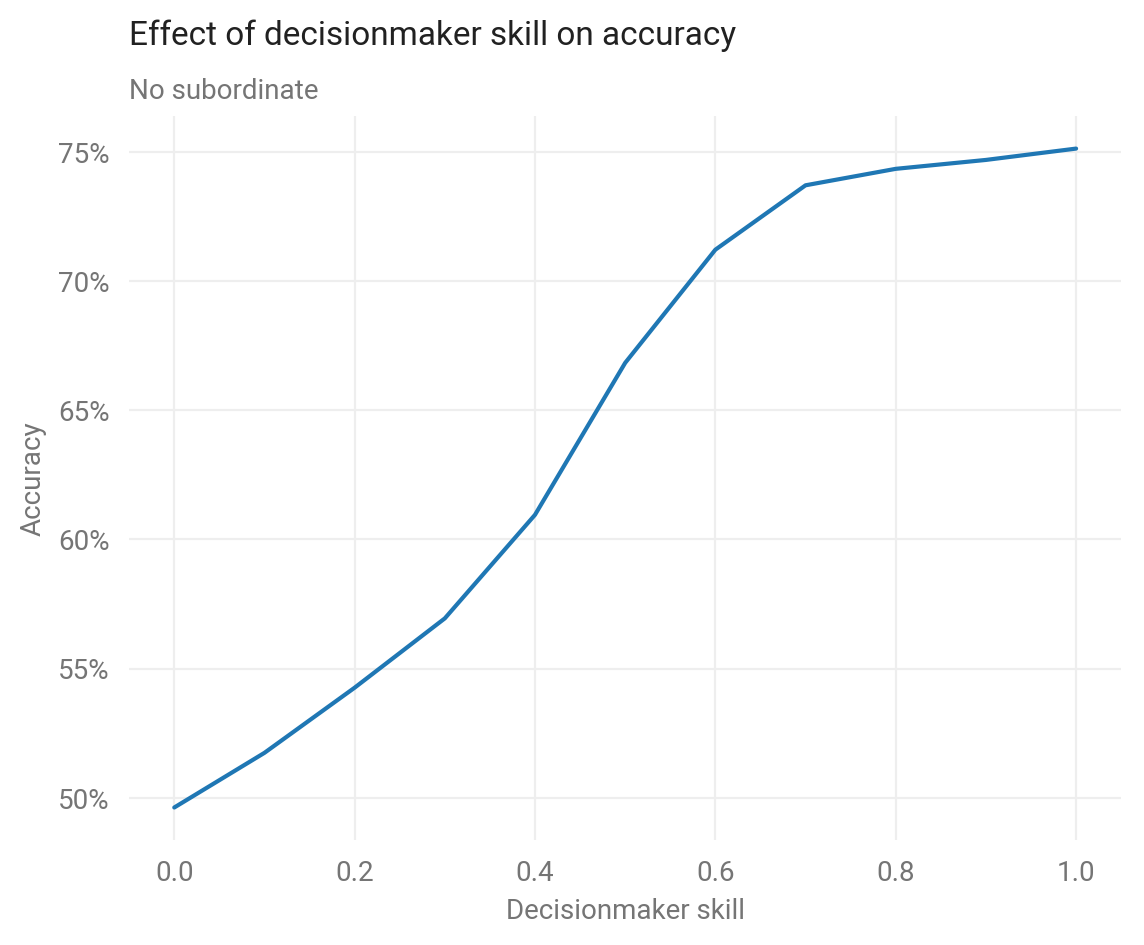

In [128]:
ax = result[(result.sy == 0) & (result.dke == 0)].plot('sx', 'accuracy')

plt.suptitle('Effect of decisionmaker skill on accuracy',
             horizontalalignment = 'left',
             x=ax.get_figure().subplotpars.left)
plt.title('No subordinate', loc='left', fontsize=10, color=AXIS_COLOR)
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
plt.xlabel('Decisionmaker skill')
plt.ylabel('Accuracy')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.legend_.remove()

### Subordinate, no DKE

In [130]:
result[(result.sy == 1) & (result.dke == 0)]

,sx,sy,dke,accuracy
110,0.0,1.0,0.0,0.75020
231,0.1,1.0,0.0,0.74777
352,0.2,1.0,0.0,0.74472
473,0.3,1.0,0.0,0.74860
594,0.4,1.0,0.0,0.74870
715,0.5,1.0,0.0,0.74615
836,0.6,1.0,0.0,0.74572
957,0.7,1.0,0.0,0.74686
1078,0.8,1.0,0.0,0.75017
1199,0.9,1.0,0.0,0.75075


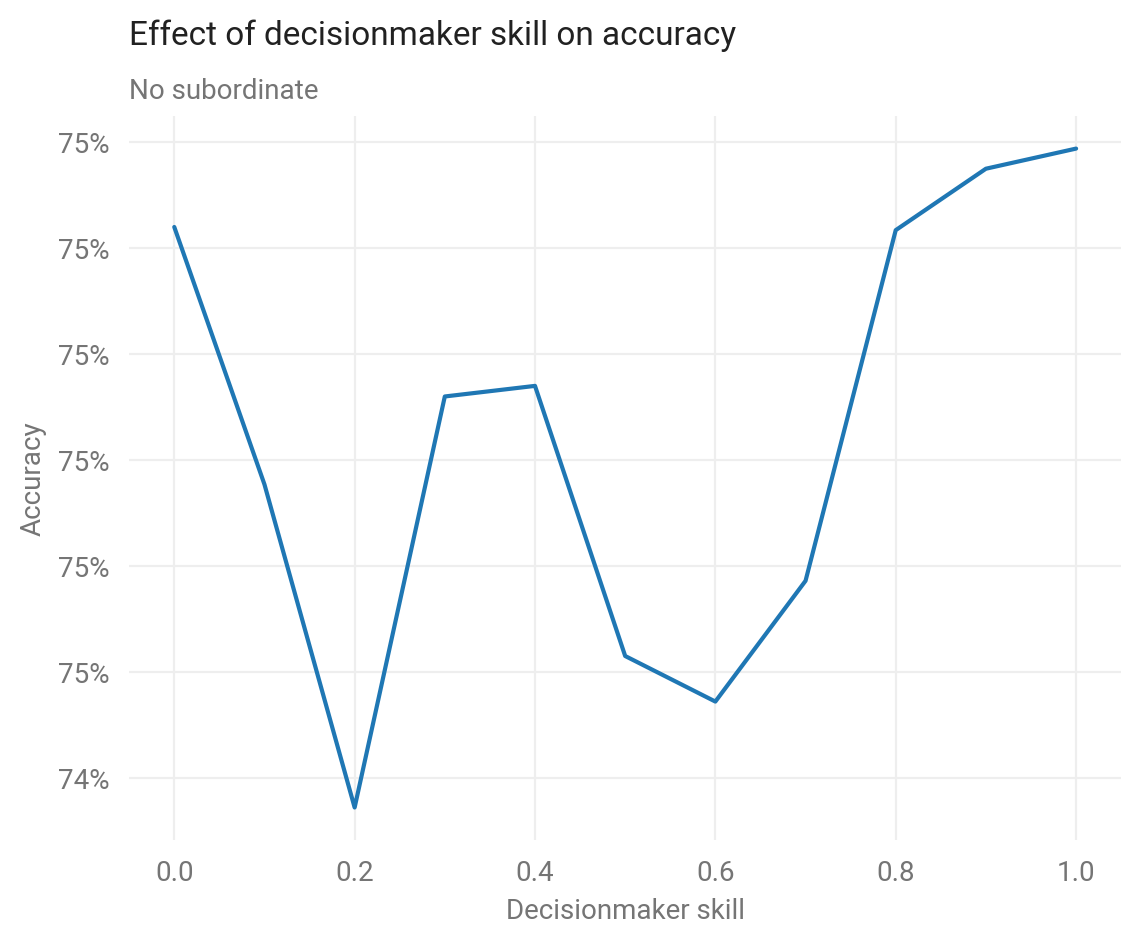

In [129]:
ax = result[(result.sy == 1) & (result.dke == 0)].plot('sx', 'accuracy')

plt.suptitle('Effect of decisionmaker skill on accuracy',
             horizontalalignment = 'left',
             x=ax.get_figure().subplotpars.left)
plt.title('No subordinate', loc='left', fontsize=10, color=AXIS_COLOR)
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
plt.xlabel('Decisionmaker skill')
plt.ylabel('Accuracy')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.legend_.remove()

In [80]:
result[result.accuracy.isna()]

,sx,sy,dke,accuracy
